<a href="https://colab.research.google.com/github/StellarSynapse/Lab_6/blob/main/LAB_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kwant

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 17.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for kwant: filename=kwant-1.5.0-cp310-cp310-linux_x86_64.whl size=4195406 sha256=1a6737a51e1745966f3a7a6ab4f4b01022184fbc26e397a18e822072cba5cfb7
  Stored in directory: /root/.cache/pip/wheels/de/ed/a6/30c685d08edea4ac466fced410ca93fb46e5721a466b743a59
  Created wheel for tinyarray: filename=tinyarray-1.2.4-cp310-cp310-linux_x86_64.whl size=253581 sha256=5a15f1d70942c1ed4ffb841854f185376ba6db19770ea13d5ddae46e4d6ac7f2
  Stored in directory: /root/.cache/pip/wheels/dc/72/12/09ea11413b527aa3c3a5757ee615ee4d206ee77043a86cbce8
Successfully built kwant tinyarray


/usr/local/lib/python3.10/dist-packages/kwant/lattice.py:746: KwantDeprecationWarning: Not specfying norbs is deprecated. Always specify norbs when creating site families.
  return Monatomic(((a, 0), (0, a)), name=name, norbs=norbs)


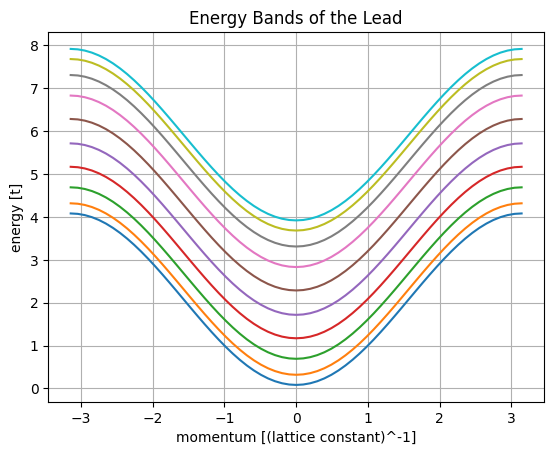

In [10]:
from matplotlib import pyplot as plt
import kwant

# Функція для створення провідника
def make_lead(a=1, t=1.0, W=10):
    lat = kwant.lattice.square(a)
    sym_lead = kwant.TranslationalSymmetry((-a, 0))  # Симетрія трансляції
    lead = kwant.Builder(sym_lead)

    # Додаємо вузли до провідника
    for j in range(W):
        lead[lat(0, j)] = 4 * t
        if j > 0:
            lead[lat(0, j), lat(0, j - 1)] = -t  # Зв'язки вздовж Y
        lead[lat(1, j), lat(0, j)] = -t  # Зв'язки вздовж X

    return lead

# Основна функція
def main():
    # Генеруємо провідник
    lead = make_lead().finalized()

    # Малюємо графік енергетичних зон
    kwant.plotter.bands(lead, show=False)
    plt.xlabel("momentum [(lattice constant)^-1]")
    plt.ylabel("energy [t]")
    plt.title("Energy Bands of the Lead")
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    main()


In [2]:
!pip install kwant
import kwant
import numpy as np
import tinyarray

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 18.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for kwant: filename=kwant-1.5.0-cp310-cp310-linux_x86_64.whl size=4195419 sha256=36ec2da6ea3110eaae97215ddf40547a40a860e6996c7df5eef3198c787ab825
  Stored in directory: /root/.cache/pip/wheels/de/ed/a6/30c685d08edea4ac466fced410ca93fb46e5721a466b743a59
  Created wheel for tinyarray: filename=tinyarray-1.2.4-cp310-cp310-linux_x86_64.whl size=253584 sha256=c48ae9efa7df77f29a3b9249c9fb34d80de574fe45991d98cb09ea3c477c1c83
  Stored in directory: /root/.cache/pip/wheels/dc/72/12/09ea11413b527aa3c3a5757ee615ee4d206ee77043a86cbce8
Successfully built kwant tinyarray


/usr/local/lib/python3.10/dist-packages/kwant/solvers/default.py:16: RuntimeWarning: MUMPS is not available, SciPy built-in solver will be used as a fallback. Performance can be very poor in this case.
  warnings.warn("MUMPS is not available, "


In [3]:
from matplotlib import pyplot

In [7]:
tau_x = tinyarray.array([[0,1],[1,0]])
tau_z = tinyarray.array([[1, 0], [0, -1]])
import matplotlib.pyplot as plt


In [5]:
def make_lead(a=1, t=1.0, mu=0.7, Delta=0.1, W=10):
    lat = kwant.lattice.square(a)
    sym_lead = kwant.TranslationalSymmetry((-a, 0))  # Симетрія трансляції
    lead = kwant.Builder(sym_lead)

    # Додаємо вузли до провідника
    for j in range(W):
        lead[lat(0, j)] = (4 * t-mu)*tau_z+Delta*tau_x
        if j > 0:
            lead[lat(0, j), lat(0, j - 1)] = -t*tau_z  # Зв'язки вздовж Y
        lead[lat(1, j), lat(0, j)] = -t*tau_z  # Зв'язки вздовж X

    return lead

/usr/local/lib/python3.10/dist-packages/kwant/lattice.py:746: KwantDeprecationWarning:

Not specfying norbs is deprecated. Always specify norbs when creating site families.



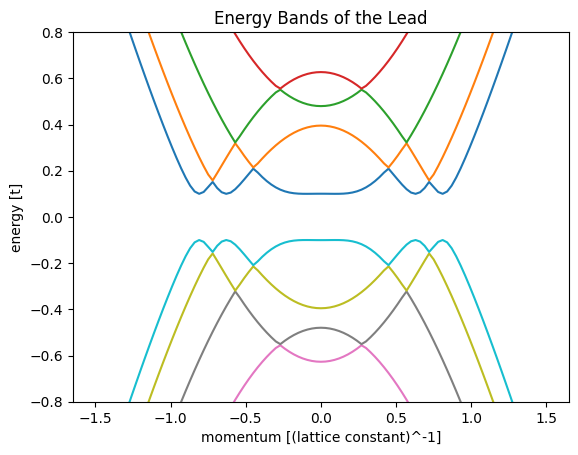

In [8]:
def main():
    # Генеруємо провідник
    lead = make_lead().finalized()

    # Малюємо графік енергетичних зон
    kwant.plotter.bands(lead, momenta=np.linspace(-1.5,1.5,101), show=False)
    plt.xlabel("momentum [(lattice constant)^-1]")
    plt.ylabel("energy [t]")
    plt.title("Energy Bands of the Lead")
    plt.ylim([-0.8,0.8])
    plt.show()

if __name__ == "__main__":
    main()

In [1]:
!pip install gitpython